In [87]:
# Imports:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [45]:
# Source-Paths

michael = "C:/Users/micha/Documents/1_Wirtschaftsinformatik/4. Semester/Data Science & Machine Learning/Gruppenprojekt/"
martin = "C:/Users/mbirk/OneDrive/Uni/Semester_4/DSML/YMMMMY/YMMMMY_repository/data/"

user = martin

ride_source= user + "2019_05.csv"
weather_source= user + "weather.csv"
census_tract_source= user + "census_tract_characteristics.csv"

In [46]:
# read data

ride = pd.read_csv(ride_source)
weather = pd.read_csv(weather_source)
census_tract = pd.read_csv(census_tract_source)

In [47]:
# raw data:

In [48]:
ride.head()

,Trip ID,Trip Miles,Trip Start Timestamp,Trip End Timestamp,Pickup Census Tract,Pickup Centroid Location,Dropoff Census Tract,Dropoff Centroid Location,Shared Trip Authorized,Trips Pooled,Trip Total,Fare,Additional Charges,Tip
0,001ab3a53a4f74430d2a9aae216fed703244cfc9,1.5,2019-05-01 00:00:00,2019-05-01 00:00:00,1.703183e+10,POINT (-87.6542980837 41.9462945357),1.703106e+10,POINT (-87.671518011 41.9579038971),False,1,5.05,2.5,2.55,0
1,01080eb6fc1bd9ec70e3fd8a2a56345754b92332,5.7,2019-05-01 00:00:00,2019-05-01 00:15:00,1.703108e+10,POINT (-87.6288741572 41.8920726347),1.703183e+10,POINT (-87.6542980837 41.9462945357),True,2,8.22,7.5,0.72,0
2,015aeacaa25560b04a0dfc6a48f95a820f9a22f6,0.7,2019-05-01 00:00:00,2019-05-01 00:15:00,1.703133e+10,POINT (-87.6173580061 41.859349715),1.703184e+10,POINT (-87.6314065252 41.8710158803),False,1,5.05,2.5,2.55,0
3,01aded4891f4d76040f68a15730afcb5003b70ea,2.7,2019-05-01 00:00:00,2019-05-01 00:15:00,1.703128e+10,POINT (-87.642648998 41.8792550844),1.703108e+10,POINT (-87.6318639497 41.8920421365),False,1,10.05,7.5,2.55,0
4,023ea4b576bf41415848e32b5fc4fae7d49e4cca,0.7,2019-05-01 00:00:00,2019-05-01 00:00:00,1.703128e+10,POINT (-87.6428084655 41.8853000224),1.703184e+10,POINT (-87.6327464887 41.8809944707),False,1,7.55,5.0,2.55,0


In [49]:
weather.head()

,date,wind,precipitation,avg_temp
0,2018-10-01,3.2,39.6,16.0
1,2018-10-02,2.3,0.3,16.7
2,2018-10-03,6.2,0.0,20.9
3,2018-10-04,7.2,1.0,18.8
4,2018-10-05,3.2,31.5,14.1


In [50]:
census_tract.head()

,ID,population,households,share_female,median_age,share_over_65,avg_household_size,share_bachelor_degree_or_higher,unemployment_rate,share_income_below_poverty_level
0,17031010100,4522,2316,0.491,35.3,0.056,1.89,0.469,0.070,0.358
1,17031010201,7039,2688,0.474,36.3,0.066,2.55,0.308,0.073,0.368
2,17031010202,2852,1102,0.513,35.7,0.134,2.30,0.333,0.065,0.185
3,17031010300,6650,3037,0.505,41.6,0.188,1.87,0.394,0.049,0.161
4,17031010400,5153,1938,0.533,25.2,0.066,1.86,0.655,0.077,0.191


In [51]:
# check for null values

In [52]:
print(ride.isnull().sum())

Trip ID                      0
Trip Miles                   0
Trip Start Timestamp         0
Trip End Timestamp           0
Pickup Census Tract          0
Pickup Centroid Location     0
Dropoff Census Tract         0
Dropoff Centroid Location    0
Shared Trip Authorized       0
Trips Pooled                 0
Trip Total                   0
Fare                         0
Additional Charges           0
Tip                          0
dtype: int64


In [53]:
print(weather.isnull().sum())

date             0
wind             0
precipitation    0
avg_temp         0
dtype: int64


In [54]:
print(census_tract.isnull().sum())

ID                                  0
population                          0
households                          0
share_female                        0
median_age                          0
share_over_65                       0
avg_household_size                  0
share_bachelor_degree_or_higher     0
unemployment_rate                   0
share_income_below_poverty_level    0
dtype: int64


In [55]:
# copy data

rawRides = ride.copy(deep = True)
rawWeather = weather.copy(deep = True)
rawCensusTract = census_tract.copy(deep = True)

In [56]:
# check types

In [57]:
rawRides.dtypes

Trip ID                       object
Trip Miles                    object
Trip Start Timestamp          object
Trip End Timestamp            object
Pickup Census Tract          float64
Pickup Centroid Location      object
Dropoff Census Tract         float64
Dropoff Centroid Location     object
Shared Trip Authorized          bool
Trips Pooled                   int64
Trip Total                   float64
Fare                         float64
Additional Charges           float64
Tip                            int64
dtype: object

In [58]:
rawWeather.dtypes

date              object
wind             float64
precipitation    float64
avg_temp         float64
dtype: object

In [59]:
rawCensusTract.dtypes

ID                                    int64
population                            int64
households                            int64
share_female                        float64
median_age                          float64
share_over_65                       float64
avg_household_size                  float64
share_bachelor_degree_or_higher     float64
unemployment_rate                   float64
share_income_below_poverty_level    float64
dtype: object

In [60]:
# convert time in rawRides and rawWeather to datetime

In [61]:
updatedRides = rawRides.copy(deep = True)
updatedWeather = rawWeather.copy(deep = True)

In [62]:
updatedRides["Trip Start Timestamp"] = pd.to_datetime(updatedRides["Trip Start Timestamp"])
updatedRides["Trip End Timestamp"] = pd.to_datetime(updatedRides["Trip End Timestamp"])
updatedWeather["date"] = pd.to_datetime(updatedWeather["date"])

In [63]:
updatedRides.dtypes

Trip ID                              object
Trip Miles                           object
Trip Start Timestamp         datetime64[ns]
Trip End Timestamp           datetime64[ns]
Pickup Census Tract                 float64
Pickup Centroid Location             object
Dropoff Census Tract                float64
Dropoff Centroid Location            object
Shared Trip Authorized                 bool
Trips Pooled                          int64
Trip Total                          float64
Fare                                float64
Additional Charges                  float64
Tip                                   int64
dtype: object

In [64]:
updatedWeather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           548 non-null    datetime64[ns]
 1   wind           548 non-null    float64       
 2   precipitation  548 non-null    float64       
 3   avg_temp       548 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 17.3 KB


In [65]:
updatedWeather.dtypes

date             datetime64[ns]
wind                    float64
precipitation           float64
avg_temp                float64
dtype: object

In [66]:
# insert 'Date' column
# only_date = updatedRides["Trip Start Timestamp"].dt.date
# updatedRides.insert(2, "Date", only_date)
# updatedRides["Date"] = pd.to_datetime(updatedRides["Date"])
# updatedRides.dtypes
only_date = updatedRides["Trip Start Timestamp"]
updatedRides.insert(2, "Date", only_date)
updatedRides["Date"] =  updatedRides["Date"].dt.date
updatedRides["Date"] =  pd.to_datetime(updatedRides["Date"])
updatedRides.dtypes

Trip ID                              object
Trip Miles                           object
Date                         datetime64[ns]
Trip Start Timestamp         datetime64[ns]
Trip End Timestamp           datetime64[ns]
Pickup Census Tract                 float64
Pickup Centroid Location             object
Dropoff Census Tract                float64
Dropoff Centroid Location            object
Shared Trip Authorized                 bool
Trips Pooled                          int64
Trip Total                          float64
Fare                                float64
Additional Charges                  float64
Tip                                   int64
dtype: object

In [67]:
# add suffix _pickup & _dropoff
updatetCensusTract_pickup = rawCensusTract.rename(columns={'ID': 'Census Tract ID_pickup',
                                                    'population': 'population_pickup',
                                                    'households': 'households_pickup',
                                                    'share_female': 'share_female_pickup',
                                                    'median_age': 'median_age_pickup',
                                                    'share_over_65': 'share_over_65_pickup',
                                                    'avg_household_size': 'avg_household_size_pickup',
                                                    'share_bachelor_degree_or_higher': 'share_bachelor_degree_or_higher_pickup',
                                                    'unemployment_rate': 'unemployment_rate_pickup',
                                                    'share_income_below_poverty_level': 'share_income_below_poverty_level_pickup'}, inplace=False)
updatetCensusTract_dropoff = rawCensusTract.rename(columns={'ID': 'Census Tract ID_dropoff',
                                                    'population': 'population_dropoff',
                                                    'households': 'households_dropoff',
                                                    'share_female': 'share_female_dropoff',
                                                    'median_age': 'median_age_dropoff',
                                                    'share_over_65': 'share_over_65_dropoff',
                                                    'avg_household_size': 'avg_household_dropoff',
                                                    'share_bachelor_degree_or_higher': 'share_bachelor_degree_or_higher_dropoff',
                                                    'unemployment_rate': 'unemployment_rate_dropoff',
                                                    'share_income_below_poverty_level': 'share_income_below_poverty_level_dropoff'}, inplace=False)

In [68]:
# join data
combined_data = updatedRides.merge(updatedWeather,how="left", left_on="Date", right_on="date")
combined_data = combined_data.merge(
    updatetCensusTract_pickup,
    left_on='Pickup Census Tract',
    right_on='Census Tract ID_pickup',
    how='left')
combined_data = combined_data.merge(
    updatetCensusTract_dropoff,
    left_on='Dropoff Census Tract',
    right_on='Census Tract ID_dropoff',
    how='left')

combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6473076 entries, 0 to 6473075
Data columns (total 39 columns):
 #   Column                                    Dtype         
---  ------                                    -----         
 0   Trip ID                                   object        
 1   Trip Miles                                object        
 2   Date                                      datetime64[ns]
 3   Trip Start Timestamp                      datetime64[ns]
 4   Trip End Timestamp                        datetime64[ns]
 5   Pickup Census Tract                       float64       
 6   Pickup Centroid Location                  object        
 7   Dropoff Census Tract                      float64       
 8   Dropoff Centroid Location                 object        
 9   Shared Trip Authorized                    bool          
 10  Trips Pooled                              int64         
 11  Trip Total                                float64       
 12  Fare          

In [69]:
# Errors in Trip Miles

In [70]:
# convert Trip Miles to float
combined_data['Trip Miles'] = combined_data['Trip Miles'].str.replace(' mi', '', regex=False)
combined_data['Trip Miles'] = pd.to_numeric(combined_data['Trip Miles'])

In [71]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6473076 entries, 0 to 6473075
Data columns (total 39 columns):
 #   Column                                    Dtype         
---  ------                                    -----         
 0   Trip ID                                   object        
 1   Trip Miles                                float64       
 2   Date                                      datetime64[ns]
 3   Trip Start Timestamp                      datetime64[ns]
 4   Trip End Timestamp                        datetime64[ns]
 5   Pickup Census Tract                       float64       
 6   Pickup Centroid Location                  object        
 7   Dropoff Census Tract                      float64       
 8   Dropoff Centroid Location                 object        
 9   Shared Trip Authorized                    bool          
 10  Trips Pooled                              int64         
 11  Trip Total                                float64       
 12  Fare          

In [72]:
# negative Trip Mile values

In [73]:
# average fare / mile (positive Trip Miles)
positiveTripMiles = combined_data[(combined_data['Trip Miles'] > 0) & (combined_data['Fare'])]
positiveTripMiles['averageTripCost'] = positiveTripMiles['Fare']/positiveTripMiles['Trip Miles']
avgCostMilePos = positiveTripMiles['averageTripCost'].mean()

# average fare / mile (negative Trip Miles)
negativeTripMiles = combined_data[(combined_data['Trip Miles'] <0) & (combined_data['Fare'])]
negativeTripMiles['averageTripCost'] = negativeTripMiles['Fare']/negativeTripMiles['Trip Miles']
avgCostMileNeg = negativeTripMiles['averageTripCost'].mean()

print(avgCostMilePos)
print(avgCostMileNeg)

3.3907753381253616
-3.393281715247924


C:\Users\mbirk\AppData\Local\Temp\ipykernel_129112\437582233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positiveTripMiles['averageTripCost'] = positiveTripMiles['Fare']/positiveTripMiles['Trip Miles']
C:\Users\mbirk\AppData\Local\Temp\ipykernel_129112\437582233.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negativeTripMiles['averageTripCost'] = negativeTripMiles['Fare']/negativeTripMiles['Trip Miles']


In [74]:
# ~same cost per mile -> use absolute values
combined_data['Trip Miles'] = combined_data['Trip Miles'].abs()


In [75]:
# cost per mile remains the same
costTripMiles = combined_data[(combined_data['Trip Miles']>0) & (combined_data['Fare'])]
costTripMiles['averageTripCost'] = costTripMiles['Fare']/costTripMiles['Trip Miles']
avgCostMile = costTripMiles['averageTripCost'].mean()
print(avgCostMile)

3.390813783707576


C:\Users\mbirk\AppData\Local\Temp\ipykernel_129112\354133875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  costTripMiles['averageTripCost'] = costTripMiles['Fare']/costTripMiles['Trip Miles']


In [76]:
# add tip_binary
tip_binary = (combined_data['Tip'] > 0).astype(int)
combined_data.insert(15, "Tip Binary", tip_binary)

In [77]:
# drop unusable data
usableData = combined_data.drop(columns=['Trip ID','Pickup Centroid Location','Dropoff Centroid Location'])

In [78]:
# correlation
usableData.corr()

,Trip Miles,Date,Trip Start Timestamp,Trip End Timestamp,Pickup Census Tract,Dropoff Census Tract,Shared Trip Authorized,Trips Pooled,Trip Total,Fare,...,Census Tract ID_dropoff,population_dropoff,households_dropoff,share_female_dropoff,median_age_dropoff,share_over_65_dropoff,avg_household_dropoff,share_bachelor_degree_or_higher_dropoff,unemployment_rate_dropoff,share_income_below_poverty_level_dropoff
Trip Miles,1.000000,0.000522,0.000483,0.003670,0.202998,0.234357,0.049374,0.065242,0.807799,0.800610,...,0.006363,-0.000511,-0.016866,0.036580,0.046486,0.065175,0.080756,-0.131943,0.092706,0.099752
Date,0.000522,1.000000,1.000000,0.018240,-0.000525,0.000529,-0.000851,-0.000490,0.000322,0.000254,...,0.000187,-0.000016,0.000015,-0.000083,0.000516,0.000287,0.000036,0.000286,-0.000712,-0.000372
Trip Start Timestamp,0.000483,1.000000,1.000000,0.018257,-0.000509,0.000459,-0.000854,-0.000488,0.000292,0.000225,...,0.000138,-0.000050,-0.000015,-0.000065,0.000520,0.000293,0.000063,0.000278,-0.000723,-0.000378
Trip End Timestamp,0.003670,0.018240,0.018257,1.000000,-0.002036,-0.008032,-0.019352,-0.018042,-0.010291,-0.015094,...,-0.008287,0.002635,0.004501,0.002785,0.005732,0.002966,-0.004100,0.007025,-0.008747,-0.008384
Pickup Census Tract,0.202998,-0.000525,-0.000509,-0.002036,1.000000,0.065762,0.048137,0.035125,0.160593,0.144246,...,0.085134,0.026260,0.020977,0.054364,0.019280,0.036910,0.020850,-0.076556,0.114277,0.098483
Dropoff Census Tract,0.234357,0.000529,0.000459,-0.008032,0.065762,1.000000,0.025786,0.015268,0.225058,0.209658,...,1.000000,0.013457,-0.074996,-0.196926,-0.173763,-0.225827,0.126440,-0.229211,0.307576,0.259148
Shared Trip Authorized,0.049374,-0.000851,-0.000854,-0.019352,0.048137,0.025786,1.000000,0.713903,-0.211020,-0.167533,...,0.059640,-0.045709,-0.072954,0.034215,-0.001133,0.023744,0.152587,-0.197430,0.152765,0.161706
Trips Pooled,0.065242,-0.000490,-0.000488,-0.018042,0.035125,0.015268,0.713903,1.000000,-0.157069,-0.141032,...,0.042287,-0.030175,-0.048569,0.017174,-0.004974,0.012473,0.097918,-0.127243,0.095500,0.106432
Trip Total,0.807799,0.000322,0.000292,-0.010291,0.160593,0.225058,-0.211020,-0.157069,1.000000,0.978755,...,-0.010123,0.045892,0.045877,0.018037,0.045802,0.044358,-0.017607,-0.007316,-0.004896,0.002590
Fare,0.800610,0.000254,0.000225,-0.015094,0.144246,0.209658,-0.167533,-0.141032,0.978755,1.000000,...,-0.006875,0.024566,0.020924,0.010364,0.036668,0.039277,0.009289,-0.031404,0.017202,0.020976


In [79]:
# Visualization:

In [80]:
# sample data to speed up compiling
sampled_data = usableData.sample(frac=0.001, random_state=42)
sampled_data.fillna(sampled_data.mean(), inplace=True)

c:\Users\mbirk\anaconda3\envs\DSML_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mbirk\anaconda3\envs\DSML_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\mbirk\anaconda3\envs\DSML_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


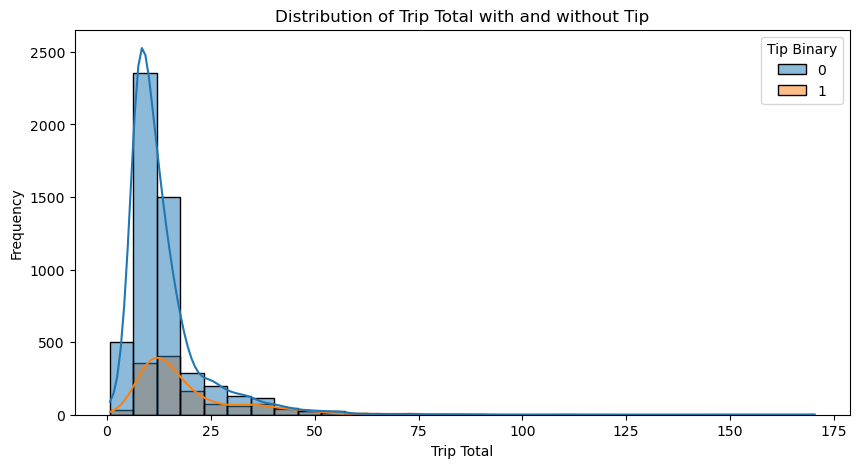

In [81]:

# Histogram of trip total with and without tip
plt.figure(figsize=(10, 5))
sns.histplot(data=sampled_data, x='Trip Total', hue='Tip Binary', kde=True, bins=30)
plt.title('Distribution of Trip Total with and without Tip')
plt.xlabel('Trip Total')
plt.ylabel('Frequency')
plt.show()

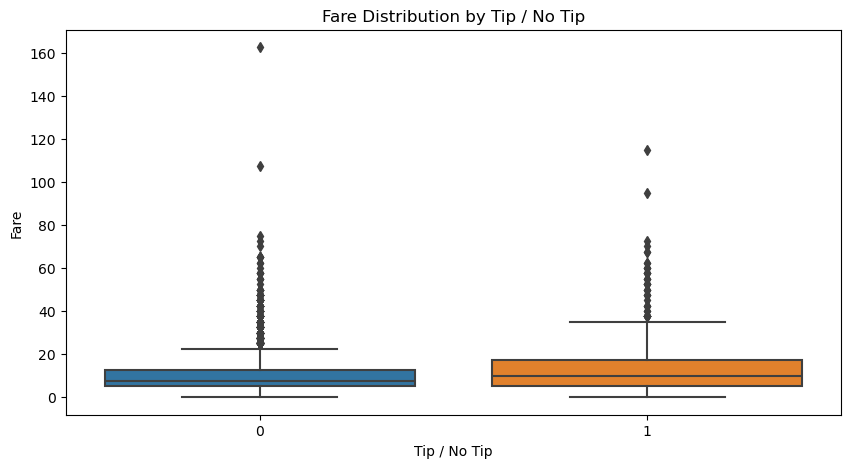

In [82]:
# Boxplot of fare by tipping status
plt.figure(figsize=(10, 5))
sns.boxplot(data=sampled_data, x='Tip Binary', y='Fare')
plt.title('Fare Distribution by Tip / No Tip')
plt.xlabel('Tip / No Tip')
plt.ylabel('Fare')
plt.show()

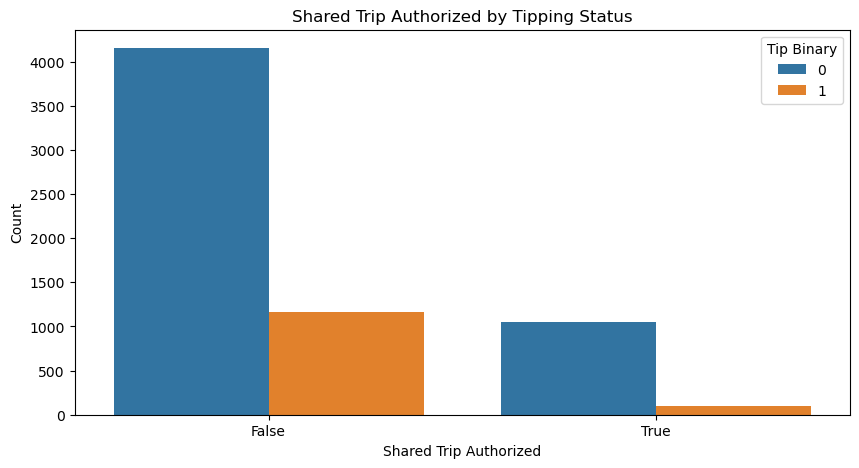

In [83]:
# Bar plot of shared trip authorized by Tip / No Tip
plt.figure(figsize=(10, 5))
sns.countplot(data=sampled_data, x='Shared Trip Authorized', hue='Tip Binary')
plt.title('Shared Trip Authorized by Tipping Status')
plt.xlabel('Shared Trip Authorized')
plt.ylabel('Count')
plt.show()

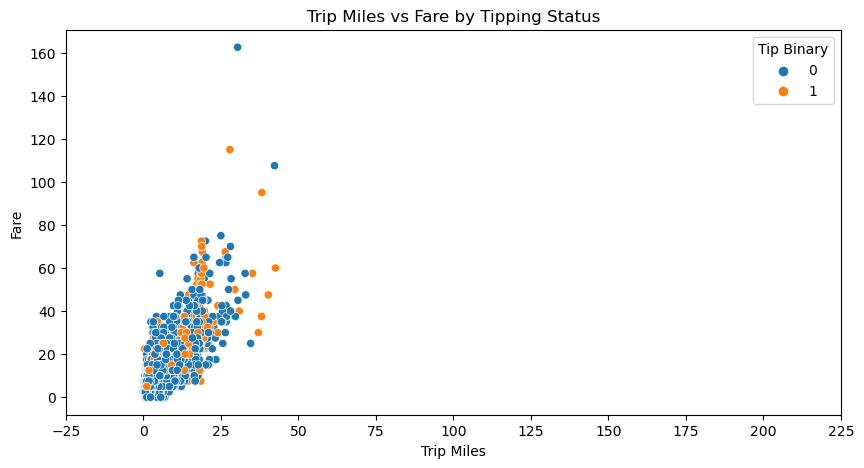

In [84]:
# Scatter plot of trip miles vs fare colored by Tip / No Tip
plt.figure(figsize=(10, 5))
sns.scatterplot(data=sampled_data, x='Trip Miles', y='Fare', hue='Tip Binary')
plt.title('Trip Miles vs Fare by Tipping Status')
plt.xlabel('Trip Miles')
plt.ylabel('Fare')
# Set x range and interval
min_trip_miles = sampled_data['Trip Miles'].min()
max_trip_miles = sampled_data['Trip Miles'].max()
plt.xlim(min_trip_miles, max_trip_miles)
# plt.xticks(ticks=np.arange(min_trip_miles, max_trip_miles, step=20))
plt.xticks(ticks=np.arange(-25, 250, step=25))
plt.show()

In [85]:
# Classification

In [92]:
# KNN Classification
knn_data = sampled_data

# feature selection
features = [
    'Trip Miles', 'wind', 'precipitation', 'avg_temp',
    'population_pickup', 'households_pickup', 'share_female_pickup',
    'median_age_pickup', 'share_over_65_pickup', 'avg_household_size_pickup',
    'share_bachelor_degree_or_higher_pickup', 'unemployment_rate_pickup',
    'share_income_below_poverty_level_pickup', 'population_dropoff',
    'households_dropoff', 'share_female_dropoff', 'median_age_dropoff',
    'share_over_65_dropoff', 'avg_household_dropoff',
    'share_bachelor_degree_or_higher_dropoff', 'unemployment_rate_dropoff',
    'share_income_below_poverty_level_dropoff'
]

# target
target = 'Tip Binary'

# Train-Test split
X = knn_data[features]
y = knn_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train KNN-model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# prediction on test-data
y_pred = knn.predict(X_test)

# calculate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# optimize k
best_k = 5
best_accuracy = 0

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k: {best_k} with accuracy: {best_accuracy}")

Accuracy: 0.7739443872296602
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      1565
           1       0.25      0.08      0.13       377

    accuracy                           0.77      1942
   macro avg       0.53      0.51      0.50      1942
weighted avg       0.70      0.77      0.73      1942

Best k: 23 with accuracy: 0.8063851699279093
